# Part II - Investigate a Dataset (TMDb movie dataset)
## by (Mamadou Adama Diallo)

## Investigation Overview
In this work, i investigate the TMDb movie dataset.
Questions:
* what are the characteristics of the films that have a very good income?
* What is the genre of films that has a very good revenue?

## Dataset Overview
the dataset contains information about 10,000 movies collected from The Movie Database(TMDb), 
including user ratings and revenue.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load the dataset 
df = pd.read_csv('tmdb-movies.csv')

In [4]:
# verify and drop duplecated data
df.drop_duplicates(inplace=True)
# I'm going to delete useless columns for my study
del_list = ['id', 'imdb_id', 'budget', 'revenue',
       'cast', 'homepage', 'director', 'tagline',
        'keywords','overview', 'runtime', 'release_date', 
            'production_companies']
df.drop(del_list, axis=1, inplace=True)
# drop missing data
df.dropna(inplace=True)

# I'm going to tranform genres column
# I'll take the first value and create new column genre_movie
# with the values i take
genre_list = []
for s in df['genres']:
    s = s.split('|')
    genre_list.append(s[0])
# create new  column  genre_movie
df['genre_movie'] = genre_list

## Distribution of Vote average
We notice that the votes are around 6.

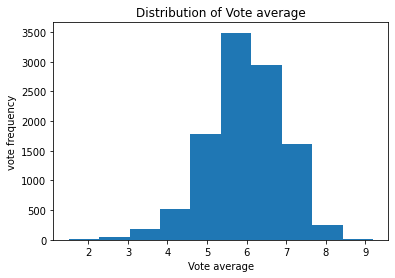

In [5]:
def set_labels(x, y, t):
    
    """
    args:
    t (str): title of the plot
    y (str): y label of the plot
    x (str): x label of the plot
    """
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    plt.show()
df['vote_average'].plot(kind='hist')
set_labels("Vote average", "vote frequency", "Distribution of Vote average")

## What is the genre of films that has a very good revenue?

The adventure movie has a very good revenue.

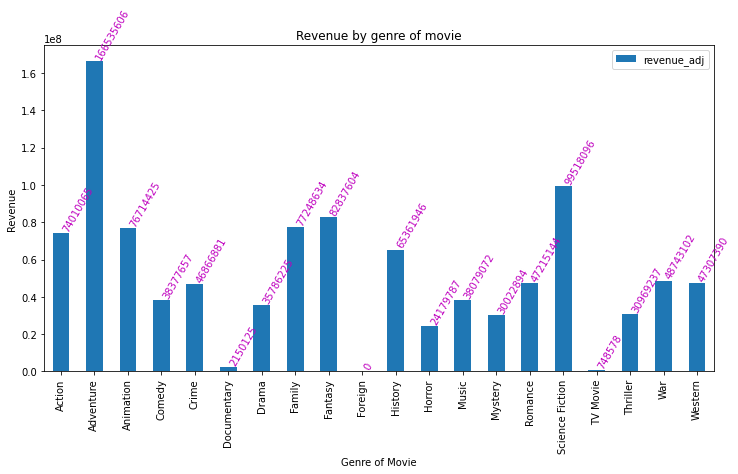

In [6]:
rev_by_genre = df.groupby('genre_movie')['revenue_adj'].mean()
plt.figure(figsize=(12, 6))
rev_by_genre.plot(kind='bar')
plt.legend()
for i, j in enumerate(rev_by_genre):
    plt.text(i ,j+300,  round(j), color='m', va ='bottom', rotation = 60) 
set_labels("Genre of Movie", "Revenue", "Revenue by genre of movie")

## what are the characteristics of the films that have a very good income?
The films that have a very good revenue are films that have a vote around 7 and have a big budget.

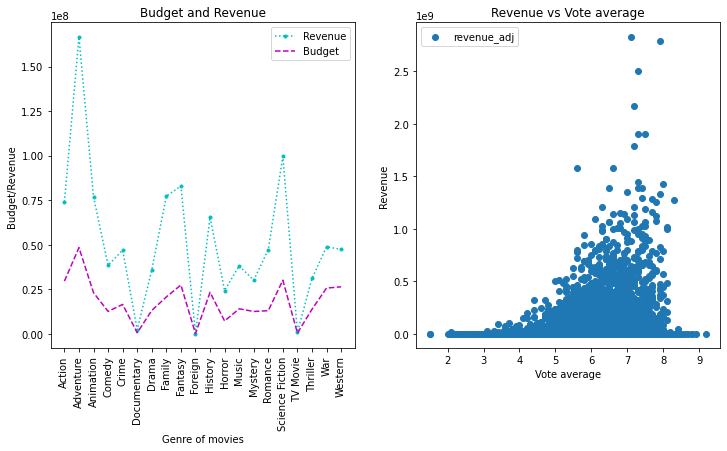

In [9]:
def set_labels_second(x, y, t):
    
    """
    args:
    t (str): title of the plot
    y (str): y label of the plot
    x (str): x label of the plot
    """
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)

budget_by_genre = df.groupby('genre_movie')['budget_adj'].mean()
rev_by_genre = df.groupby('genre_movie')['revenue_adj'].mean()
genre = df.groupby('genre_movie')['revenue_adj'].sum().index

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1,) # row 1, col 2 index 1
plt.plot(genre, rev_by_genre, "c:.", label = "Revenue")
plt.plot(genre, budget_by_genre, "m--", label = "Budget")
#plt.xlabel("Genre of movies")
#plt.ylabel("Budget/Revenue", )
plt.xticks(genre, rotation = 90)
#plt.title("Budget and Revenue")
plt.legend()
#plt.show()
set_labels_second("Genre of movies", "Budget/Revenue", "Budget and Revenue")

# plot vote vs revenue
plt.subplot(1, 2, 2) # index 2
#df.plot(kind='scatter', x = 'vote_average', y = 'revenue_adj')
plt.scatter(data=df, x = 'vote_average', y = 'revenue_adj')
plt.legend()
set_labels_second("Vote average", "Revenue", "Revenue vs Vote average")

In [8]:
#!jupyter nbconvert Investigate_a_Dataset_slide_deck.ipynb --to slides --post serve --no-input --no-prompt